In [2]:
from libdatasets import *
import librun
import libstop
from importlib import reload
from libadversarial import uncertainty_stop
from libstop import rank_stop_conds
from dotenv import load_dotenv; load_dotenv();

In [3]:
def noise():
    pass
matrix = {
    "datasets": [
        #("newsgroups", wrap(newsgroups, None)),
        ("rcv1", wrap(rcv1, None)),
        #("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("avila", wrap(avila, None)),
        #("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        
    ],
    "dataset_mutators": {
        "noise10": partial(noise, amount=1e-1)
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}


In [4]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

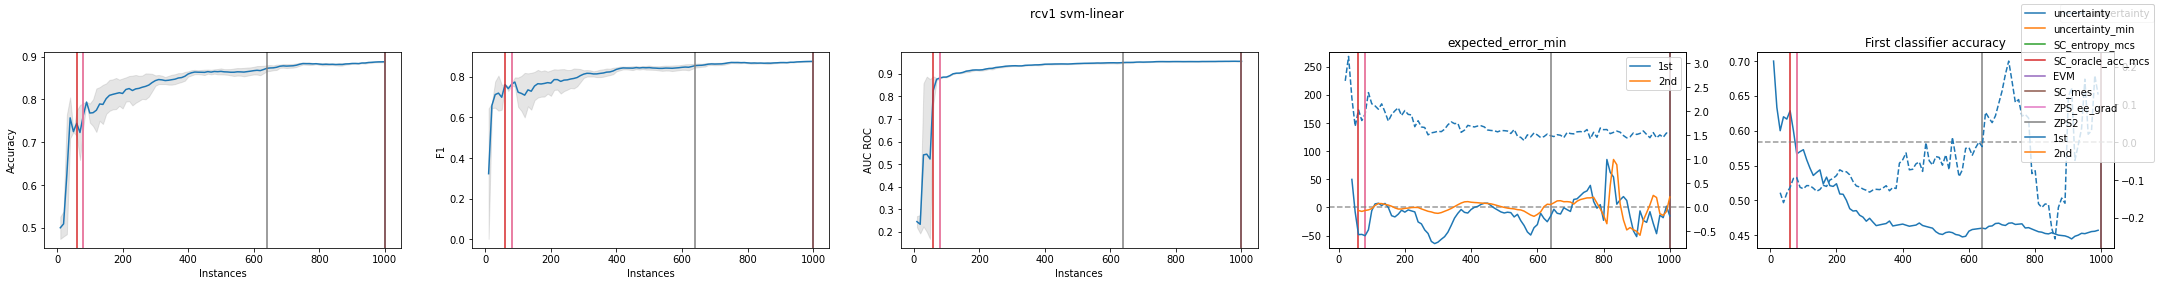

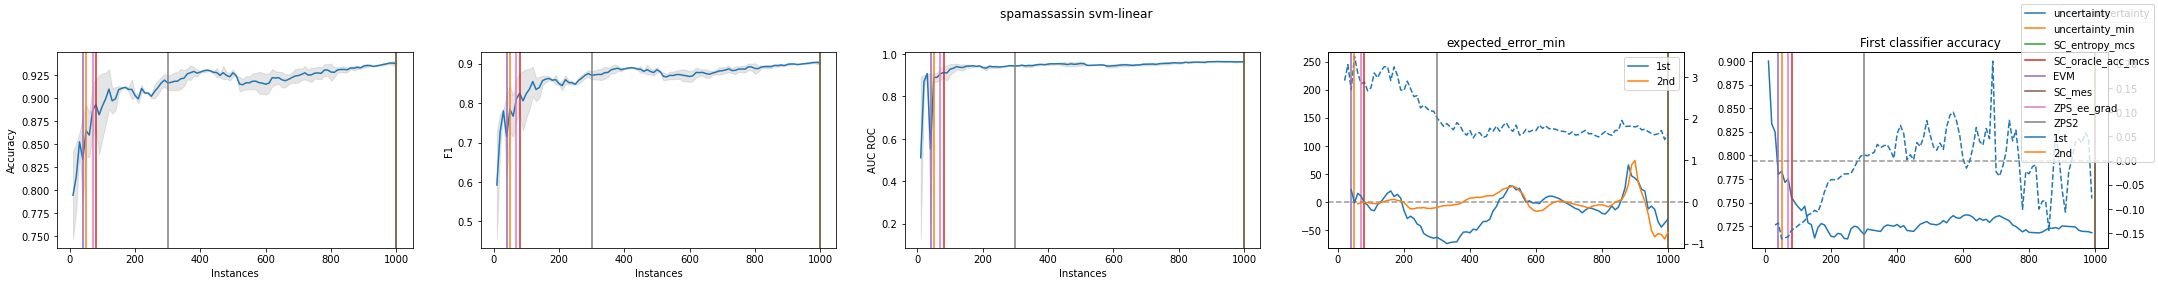

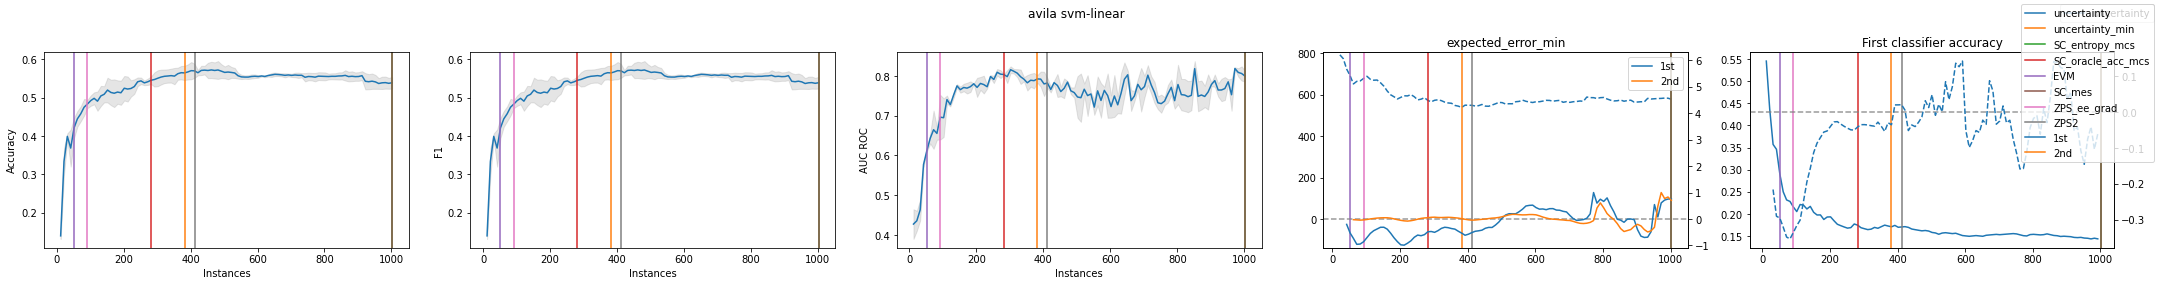

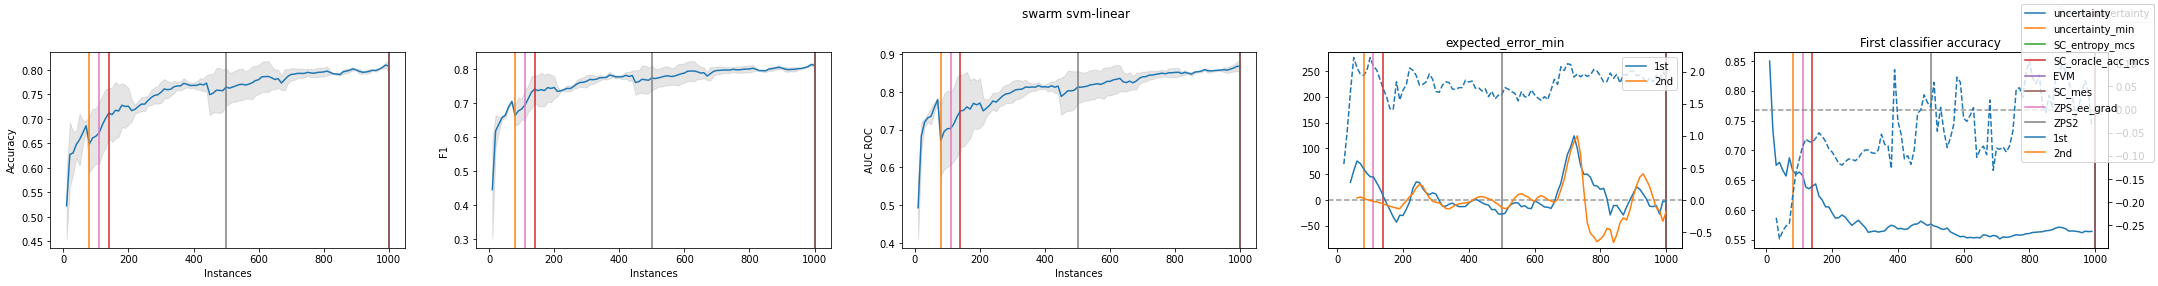

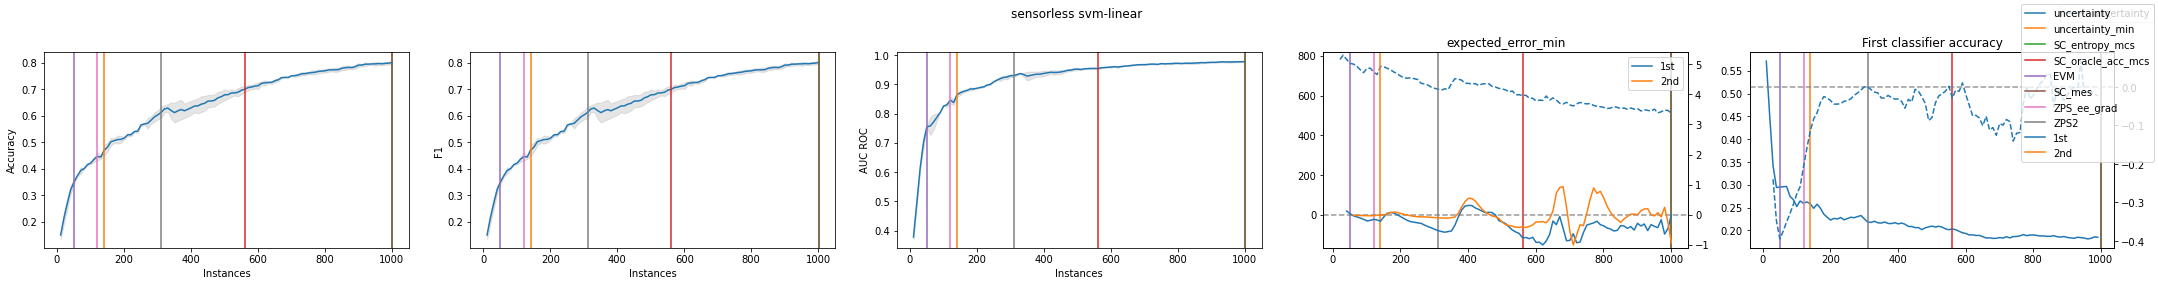

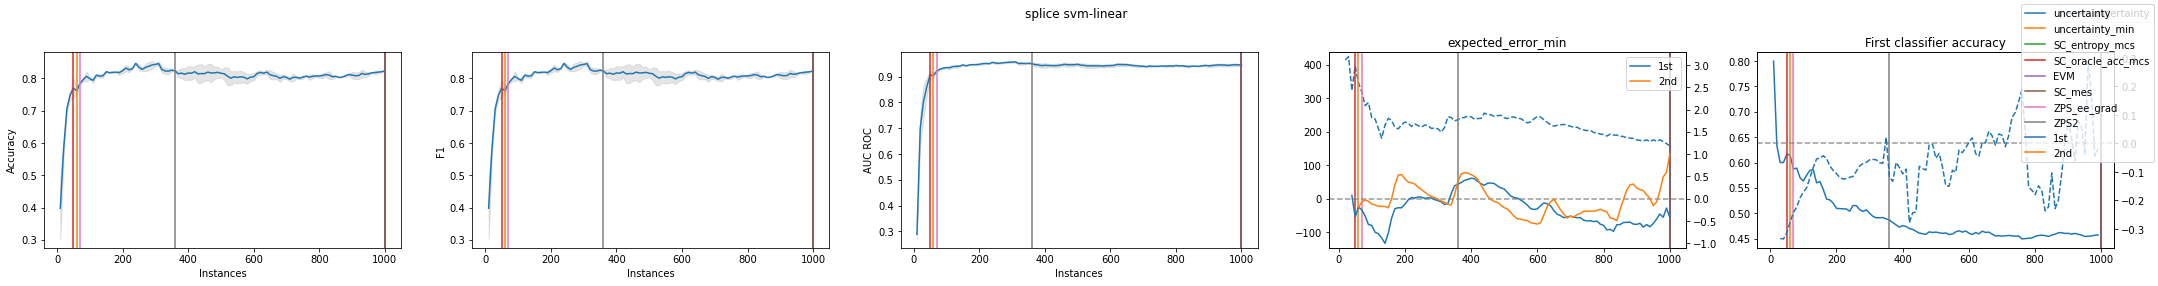

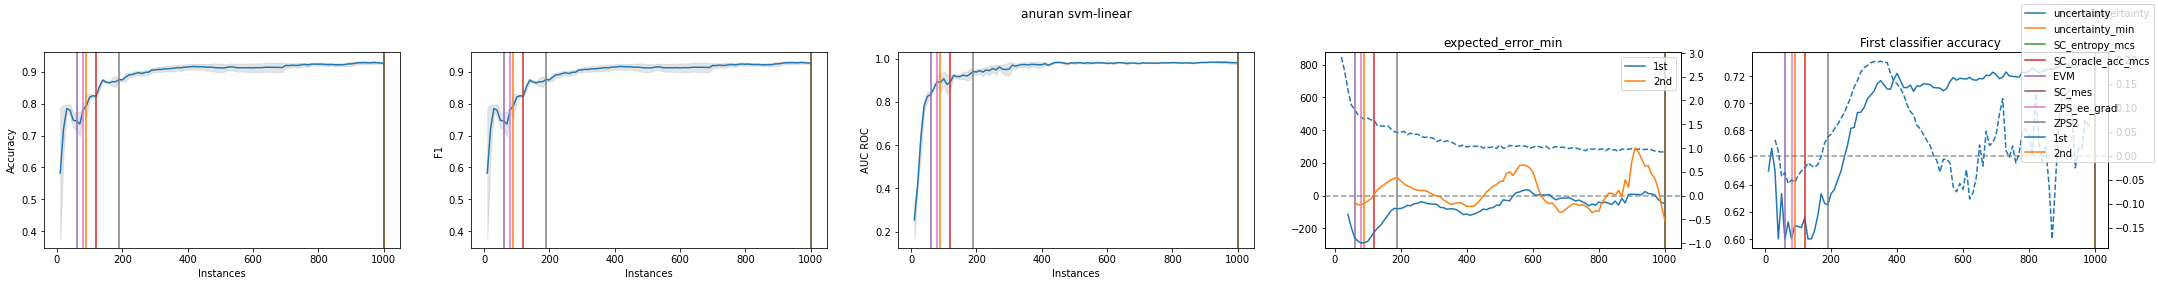

In [5]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

In [20]:
reload(librun); from librun import passive_score

In [21]:
passive_score([results_plots[2]])

C:\Users\Zac\Programming\python\research\libactive.py:71: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if klass not in Y_labelled:
C:\Users\Zac\Programming\python\research\libactive.py:71: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if klass not in Y_labelled:


([[0.5719762315506997, 0.5333525014376078]],
 [[0.5719762315506997, 0.5333525014376078]],
 [[0.8898795246394817, 0.8876906255789364]])

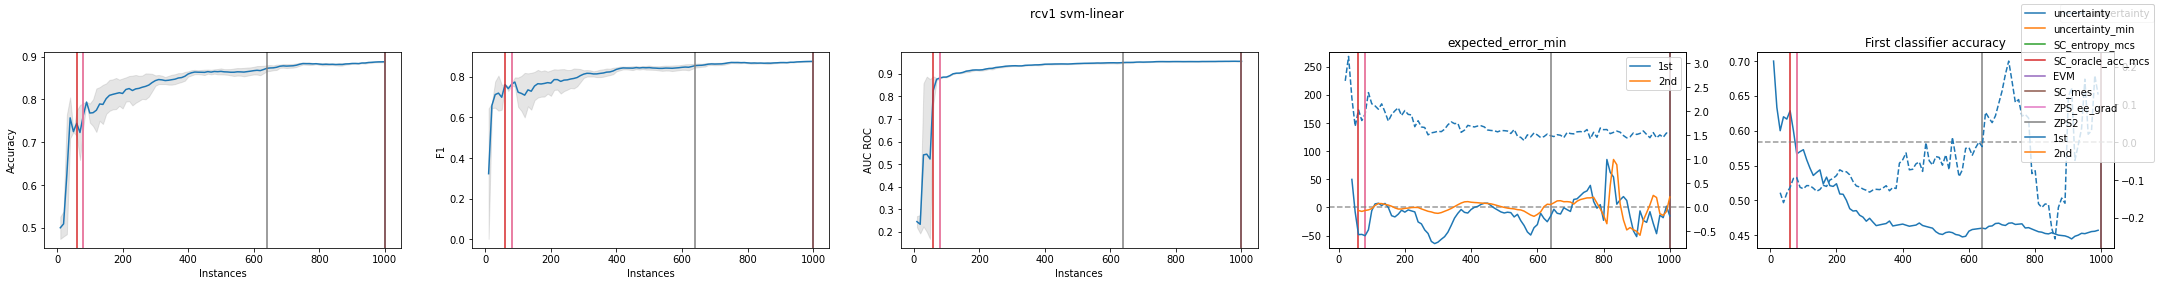

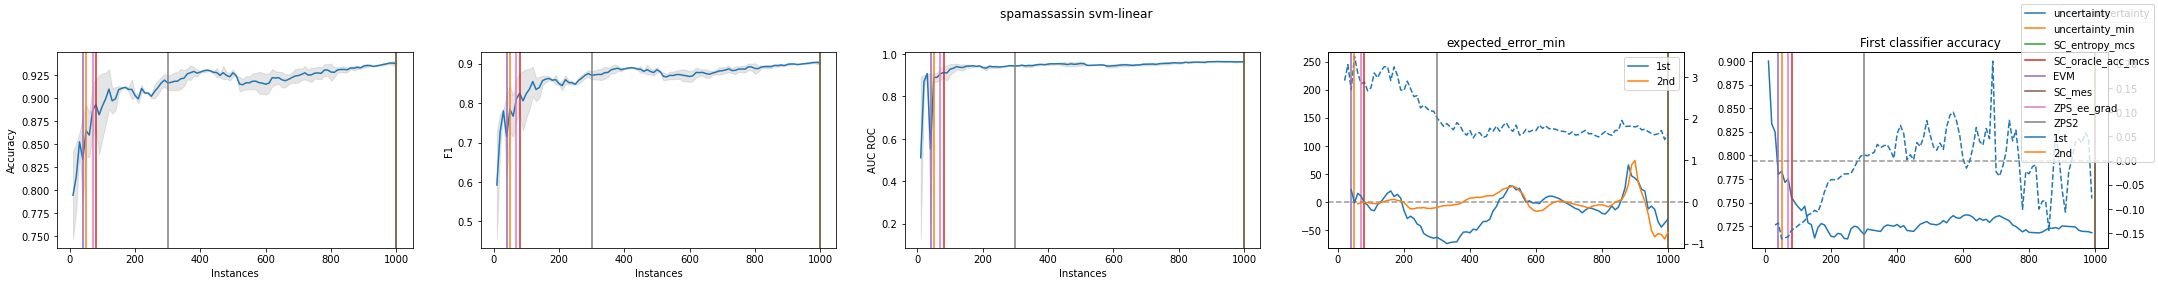

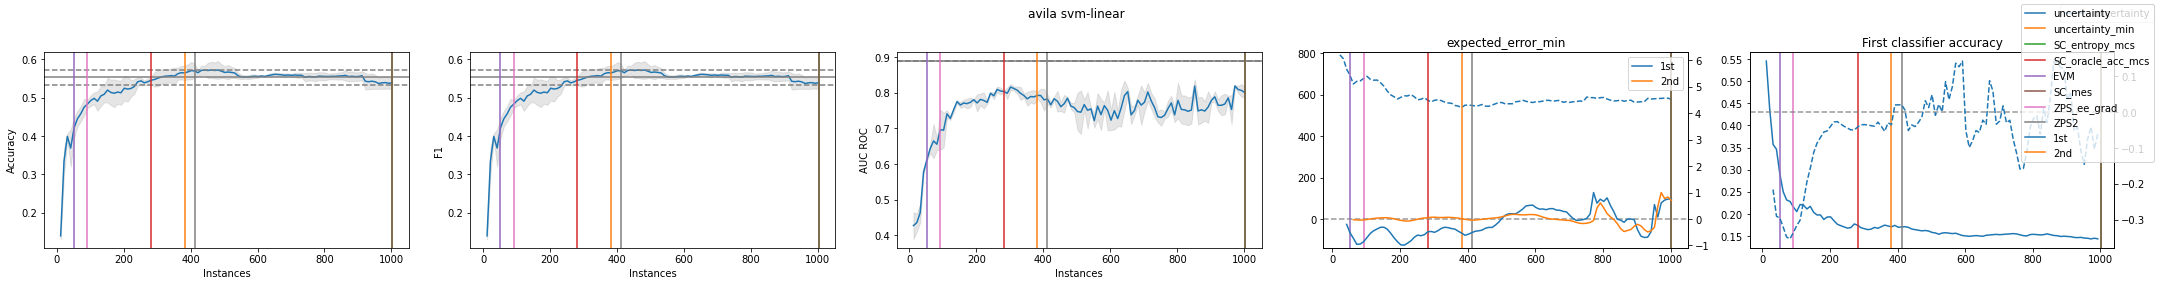

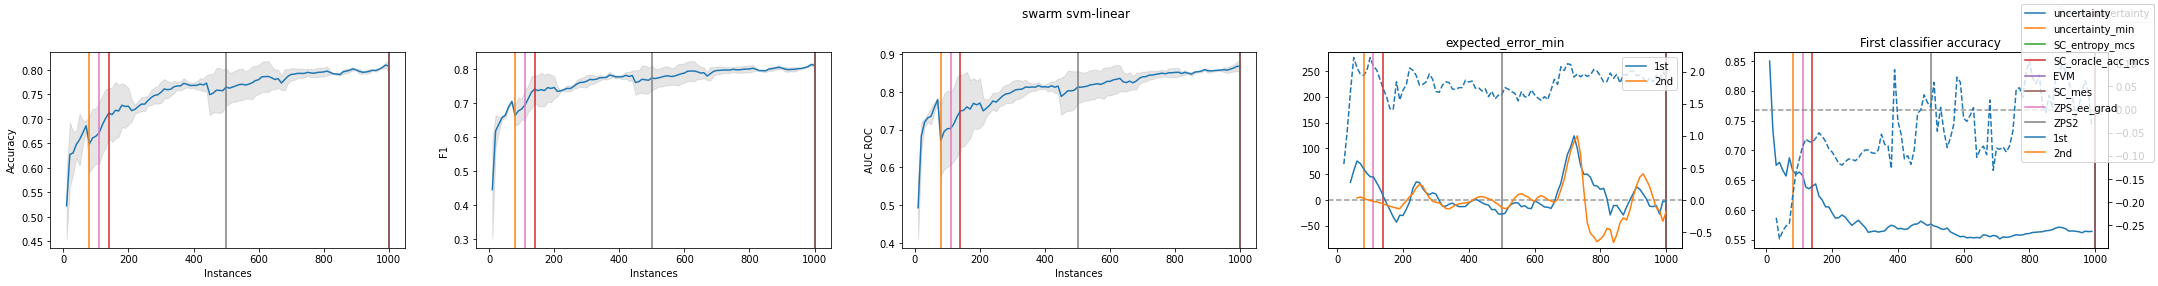

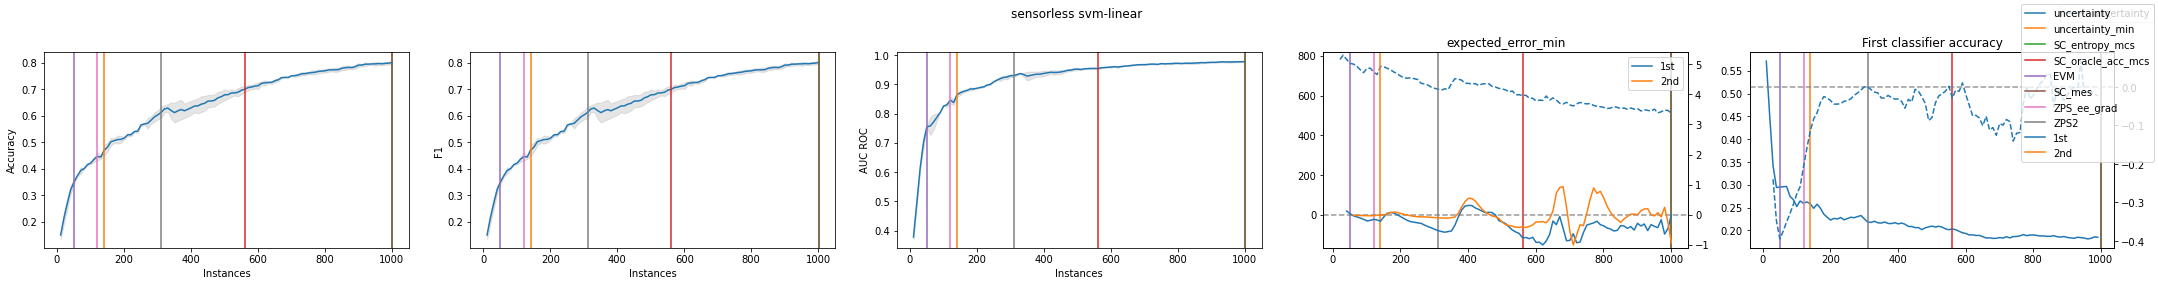

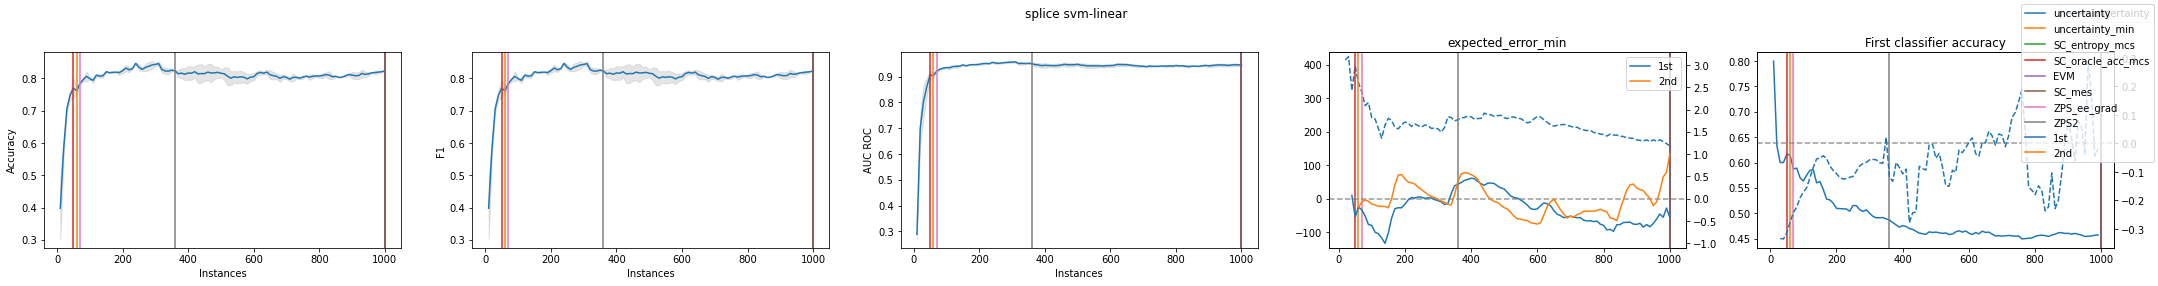

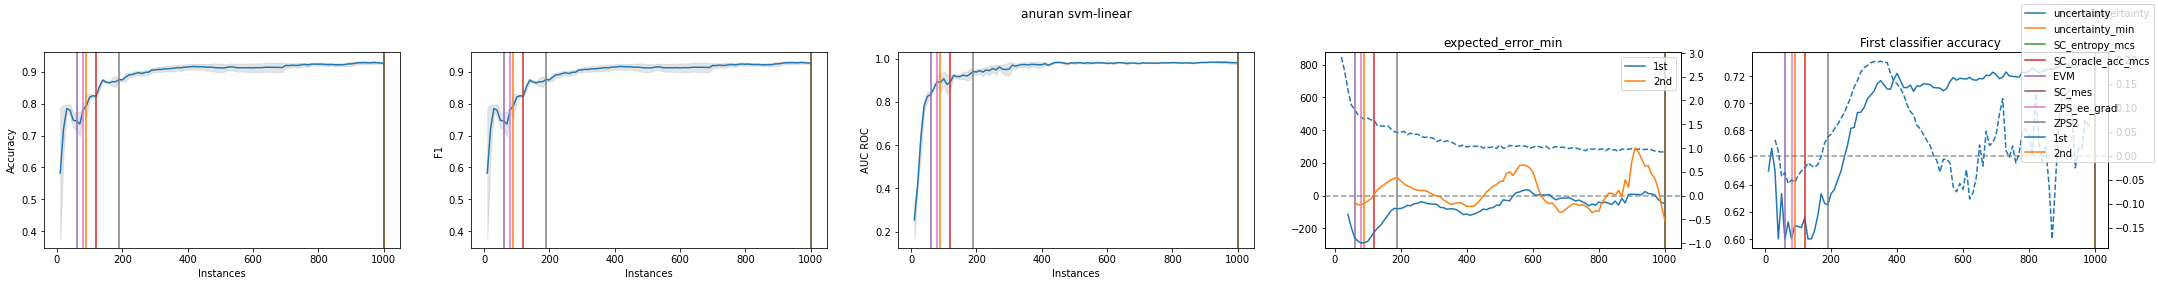

In [24]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4), lines=[
    [], [], 
    [[[0.5719762315506997, 0.5333525014376078]], [[0.5719762315506997, 0.5333525014376078]], [[0.8898795246394817, 0.8876906255789364]]],
    [], [], [], [], 
])